<a href="https://colab.research.google.com/github/sreekar092004/Java-Program/blob/main/DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shape of the file


In [16]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cars = pd.read_csv("/content/USA_cars_datasets.csv")
sns.set(color_codes=True)
cars.shape

(2499, 13)

# Head of the file

In [17]:
cars.head

<bound method NDFrame.head of       Unnamed: 0  price      brand    model  year   title_status   mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1              1   2899       ford       se  2011  clean vehicle  190552.0   
2              2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3              3  25000       ford     door  2014  clean vehicle   64146.0   
4              4  27700  chevrolet     1500  2018  clean vehicle    6654.0   
...          ...    ...        ...      ...   ...            ...       ...   
2494        2494   7800     nissan    versa  2019  clean vehicle   23609.0   
2495        2495   9200     nissan    versa  2018  clean vehicle   34553.0   
2496        2496   9200     nissan    versa  2018  clean vehicle   31594.0   
2497        2497   9200     nissan    versa  2018  clean vehicle   32557.0   
2498        2498   9200     nissan    versa  2018  clean vehicle   31371.0   

       color                  vin

# Tail of the file

In [18]:
cars.tail

<bound method NDFrame.tail of       Unnamed: 0  price      brand    model  year   title_status   mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1              1   2899       ford       se  2011  clean vehicle  190552.0   
2              2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3              3  25000       ford     door  2014  clean vehicle   64146.0   
4              4  27700  chevrolet     1500  2018  clean vehicle    6654.0   
...          ...    ...        ...      ...   ...            ...       ...   
2494        2494   7800     nissan    versa  2019  clean vehicle   23609.0   
2495        2495   9200     nissan    versa  2018  clean vehicle   34553.0   
2496        2496   9200     nissan    versa  2018  clean vehicle   31594.0   
2497        2497   9200     nissan    versa  2018  clean vehicle   32557.0   
2498        2498   9200     nissan    versa  2018  clean vehicle   31371.0   

       color                  vin

# Types of data


In [19]:
cars.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

# Removing rows

In [20]:
condition = np.arange(cars.shape[0]) < 6
cars = cars[condition]
print(cars.shape)

(6, 13)


# Removing columns

In [21]:
cars = cars.drop(cars.columns[0], axis=1)
print(cars.shape)

(6, 12)


# Deleting duplicate rows

In [22]:
cars = cars.drop_duplicates()
cars = cars.T.drop_duplicates().T
print(cars.shape)

(6, 12)


# Dropping missing value

In [23]:
cars = cars.dropna()
print(cars.shape)

(6, 12)


# Boxplot

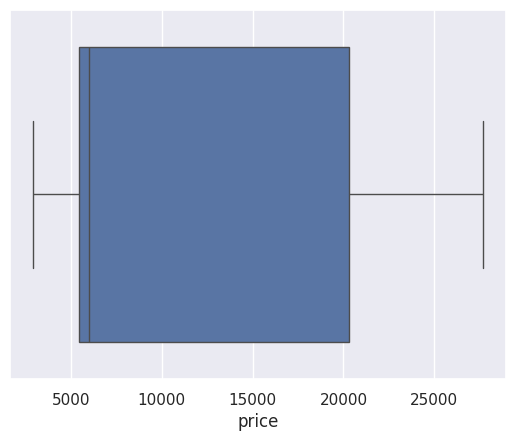

In [24]:
sns.boxplot(x=cars['price'])
plt.show()

# Inter quartile range

In [25]:
cars = cars.dropna(subset=['price'])
q1 = cars['price'].quantile(0.25)
q3 = cars['price'].quantile(0.75)
IQR = q3-q1
print(IQR)

14887.5


# Outliers

In [26]:
numeric_columns = cars.select_dtypes(include=['number']).columns

outliers = cars[~((cars[numeric_columns] < (q1 - 1.5 * IQR)) | (cars[numeric_columns] > (q3 + 1.5 * IQR))).any(axis=1)]

print("Rows with outliers:")
print(outliers)

Rows with outliers:
   price      brand    model  year   title_status   mileage   color  \
0   6300     toyota  cruiser  2008  clean vehicle  274117.0   black   
1   2899       ford       se  2011  clean vehicle  190552.0  silver   
2   5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3  25000       ford     door  2014  clean vehicle   64146.0    blue   
4  27700  chevrolet     1500  2018  clean vehicle    6654.0     red   
5   5700      dodge      mpv  2018  clean vehicle   45561.0   white   

                   vin        lot       state country      condition  
0    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4    3gcpcrec2jg473991  167763266     florida     usa  22 hours left  
5    2c4rdgeg9jr237989  167655771       texas     usa   

# Bar Graph

Available columns: Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')


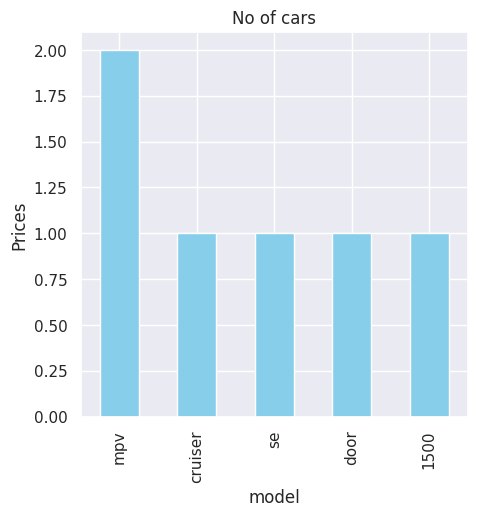

In [27]:
print("Available columns:", cars.columns)

column_to_plot = 'model'

cars[column_to_plot].value_counts().nlargest(10).plot(kind='bar', figsize=(5, 5), color='skyblue')
plt.title("No of cars")
plt.ylabel('Prices')
plt.xlabel(f'{column_to_plot}')
plt.show()

# Heat Map

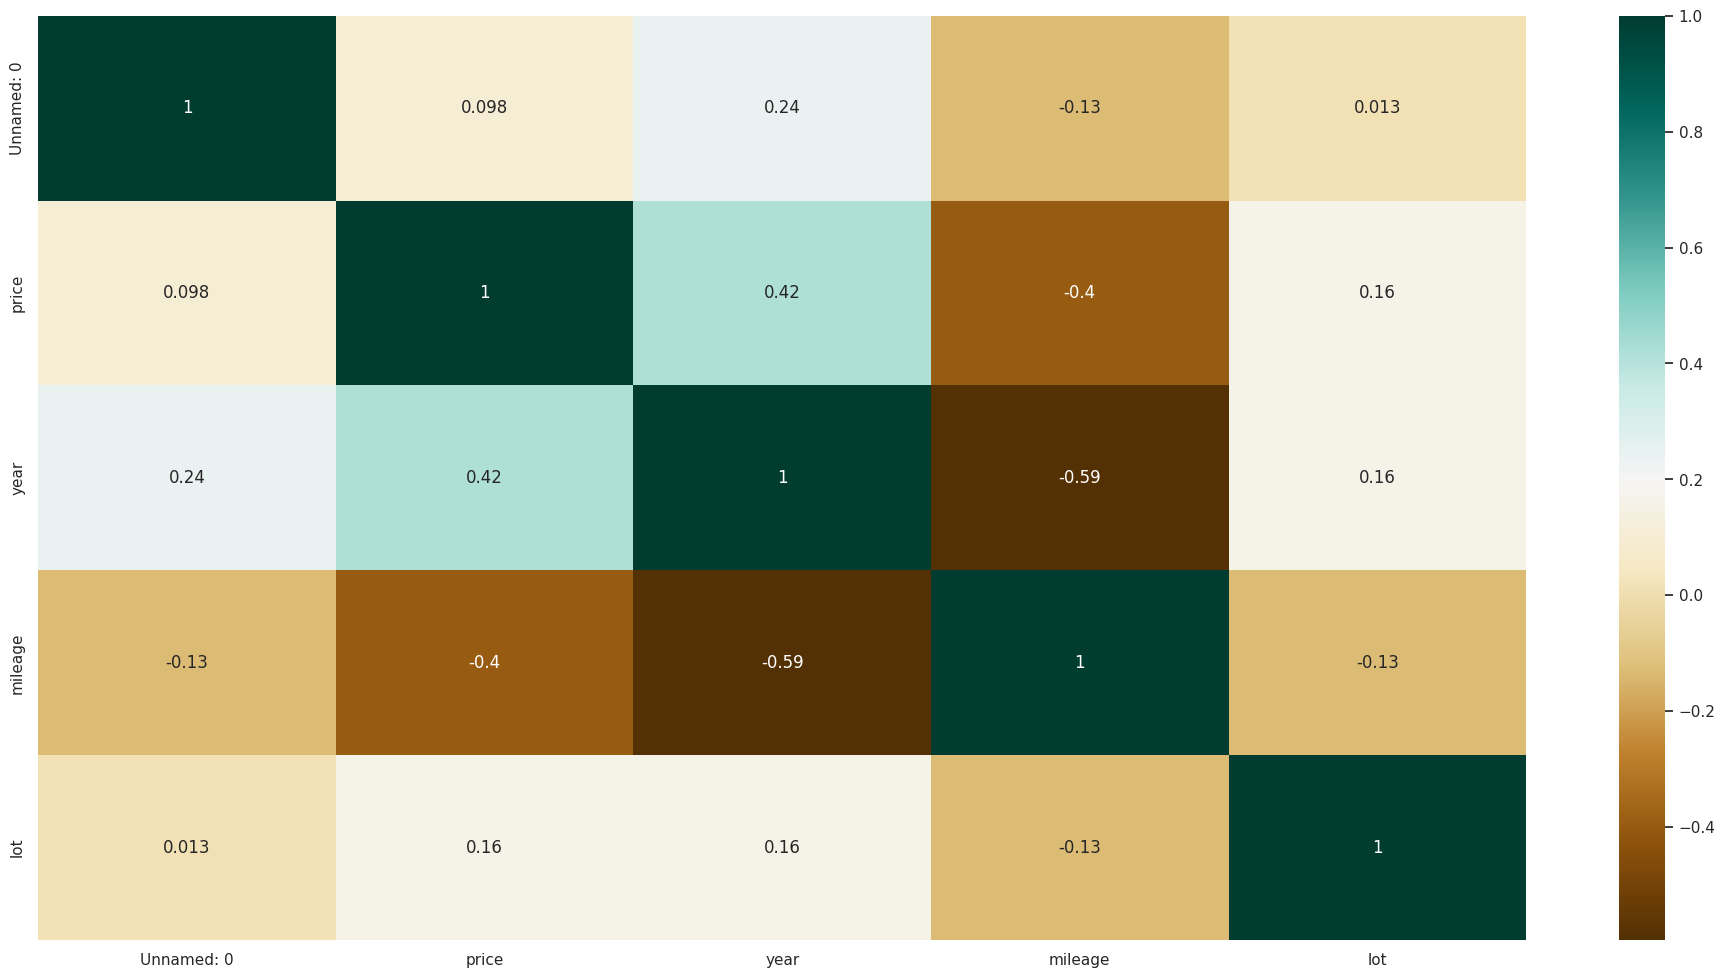

Correlation Matrix:
            Unnamed: 0     price      year   mileage       lot
Unnamed: 0    1.000000  0.098417  0.244921 -0.129258  0.012577
price         0.098417  1.000000  0.418274 -0.400838  0.159369
year          0.244921  0.418274  1.000000 -0.594686  0.164582
mileage      -0.129258 -0.400838 -0.594686  1.000000 -0.130475
lot           0.012577  0.159369  0.164582 -0.130475  1.000000


In [28]:
cars = pd.read_csv("/content/USA_cars_datasets.csv")
numeric_columns = cars.select_dtypes(include=['number'])
c = numeric_columns.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

print("Correlation Matrix:")
print(c)


# Scatterplot

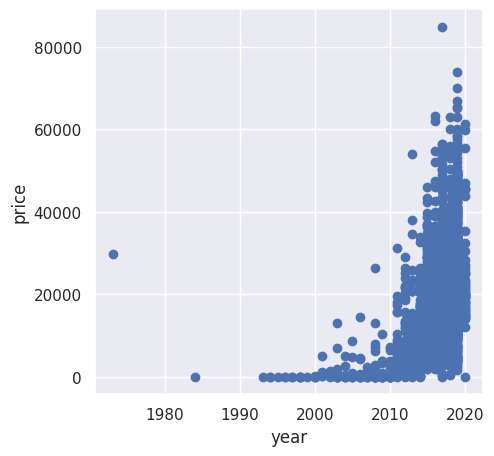

In [29]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(cars['year'], cars['price'])
ax.set_xlabel('year')
ax.set_ylabel('price')
plt.show()